# 制約付き最適化

参考：
* [機械学習のための連続最適化](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E9%80%A3%E7%B6%9A%E6%9C%80%E9%81%A9%E5%8C%96-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E9%87%91%E6%A3%AE-%E6%95%AC%E6%96%87/dp/406152920X) 9章以降


## 等式制約とラグランジュの未定乗数法

次の制約付き最適化問題について学んでいきます．
$$
\min_{x \in \mathbb{R}^n} f(x) \quad \text{ s.t. } g_i(x) = 0,  \quad i=i, \dots, p
$$

以降では簡単のために$p < n$とし，$f, g_1, \dots, g_n$は全て微分可能とします．

### １次の最適性条件

上の制約付き最適化問題について，その局所最適解$x^*$は何を満たすでしょうか？
簡単のため，等式制約が１つの場合を考えましょう．
つまり，

$$
\min_{x \in \mathbb{R}^n} f(x) \quad \text{ s.t. } g_1(x) = 0
$$
とします．
また，$g_1(x)$は１回連続微分可能であるとします．すなわち，$x^*$が局所解ならば，その近傍の実行可能解である
$$
x \in B(x^*, \delta) \cap \{x \in \mathbb{R}^n \mid g_1(x) =0\}
$$
における$f(x)$が$f(x^*)$より小さくなりません．これはいつ成立するでしょうか？

そのために，なんらかの１次元パラメータ$t\in \mathbb{R}$から実行可能解への写像$t\mapsto x(t)$を考えましょう．
$x(t)$は$t$に関して微分可能で$x(0)=x^*$とします．このとき任意の$t$で$x(t)$は実行可能解（つまり$g_1(x(t))=0$）です．よって，その微分について
$$
\nabla g_1(x^*)^\top \frac{dx}{dt}(0) = 0
$$
が成り立ちます．また，$f(x(t))$は$x(0)$で極小値をとるので，
$$
\nabla f(x^*)^\top \frac{dx}{dt}(0) = 0
$$
が成り立ちます．

よって，適当な１次元パラメータ$t\in \mathbb{R}$から実行可能解への写像$t\mapsto x(t)$について上記の関係式が成り立つので， 
「$\nabla g_1(x^*)$に直交する任意の$\frac{dx}{dt}(0)$に対して，$\nabla f(x^*)$が直交します．」

**すなわち$\nabla g_1(x^*)$と$\nabla f(x^*)$は１次従属です．**
つまり，$\nabla g_1(x^*) \neq 0$のとき，
$$\nabla f(x^*) + \lambda_1 \nabla g_1(x^*)=0$$
をみたすような$\lambda_1 \in \mathbb{R}$が存在します．

丁寧に書くと次を得ます

---

**1次の必要条件**

$f, g_1, \dots, g_p$は一回連続微分可能とします．
局所最適解を$x^*$として，$\nabla g_1(x^*), \dots, \nabla g_p(x^*)$は一次独立とします．このとき，$\lambda_1^*, \dots, \lambda_p^*$が存在して，

$$
\begin{aligned}
&\nabla f(x^*) + \sum^p_{i=1} \lambda_i^* \nabla g_i (x^*)=0\\
&g_i(x^*) = 0
\end{aligned}
$$
が成り立ちます．

証明は教科書参照．

---

この１次の必要条件を満たすパラメータ$(x^*, \lambda^*)$は$(x, \lambda)$に関する１次方程式の解とみなせます．

これは$(x^*, \lambda^*)$についての方程式です．$x^*$の変数の数が$n$個，$\lambda^*$の変数の数が$p$個，１つ目の式が$n$本，制約の式が$p$本あるので解を持つことが期待でき，特にこの変数$\lambda$を**ラグランジュ乗数**といいます．

ラグランジュ関数を

$$
L(x, \lambda) = f(x) + \sum^p_{i=1}\lambda_i g_i(x)
$$
とすると，１次の必要条件は

$$
\begin{aligned}
\frac{\partial L}{\partial x_i} (x^*, \lambda^*) = 0, \quad i = 1, \dots, n\\
\frac{\partial L}{\partial \lambda_j} (x^*, \lambda^*) = 0, \quad j = 1, \dots, p
\end{aligned}
$$

と等価です．ラグランジュ関数についての線型方程式を解くことで$(x^*, \lambda^*)$なる最適解の候補（停留点）を得る方法を，**ラグランジュの未定乗数法**といいます．

この必要条件を満たす$\lambda^*$が存在するかどうかは$\nabla g_i(x^*)$の１次独立性に依存します．いくつか例を見てみましょう．

---

次の最適化問題を考えましょう：

$$
\min_{x_1, x_2, x_3 \in \mathbb{R}^3} x_1 + x_2^2\text{ s.t. } g_1(x) := x_3 = 0, g_2(x):= x_3 - x_1^2 = 0
$$

このときの実行可能領域は$\{(0, x_2, 0)\mid x_2 \in \mathbb{R}\}$なので，最適解は$x^*=(0, 0, 0)$です．
このときの１次の最適性条件を見てみましょう．

$\nabla f(x^*)= (1, 0, 0)$,
$\nabla g_1(x^*)= (0, 0, 1)$,
$\nabla g_2(x^*)= (0, 0, 1)$
このとき$g_1$と$g_2$は一次独立ではありません．
よって，この例では１次の必要条件を満たす$\lambda^*$は存在しません．

---



## ２次の最適性条件

1次の最適性条件は制約付き問題の停留点を与えますが，局所最適であることの十分条件ではありません．
次の２次の必要条件と十分条件について見ていきましょう．

---

**２次の必要条件**

$f, g_1, \dots, g_p$は２回連続微分可能とします．
$\nabla g_1(x^*), \dots, \nabla g_p(x^*)$は１次独立とします．
このとき１次の必要条件を満たす$\lambda_1^*, \dots, \lambda_p^*$が存在します．

部分空間$S$を
$$
S=\{y \in \mathbb{R}^n \mid \nabla g_i(x^*)^\top y=0 , i=1, \dots, p\}
$$
を勾配と直行するベクトルの集合とします．行列$L\in \mathbb{R}^{n\times n}$をラグランジュ関数の二次勾配の和
$$
L=\nabla^2 f(x^*) + \sum^m_{i=1} \lambda_i^* \nabla^2 g_i(x^*)
$$
とします．このとき，任意の$y \in S$に対して
$$
y^\top L y \geq 0
$$
が成り立ちます．

**証明**

実行可能領域に値を取る１変数関数$t \to x(t)$を考えましょう．$x(t)$は二回微分可能で$x(0)=x^*$とします．このとき，$f(x(t))$の$t$に関する２解微分は$t=0$で非負になる（最適性より）ので，

$$
\begin{aligned}
&\frac{d^2}{d t^2} f(x(t)) \mid_{t=0} \geq 0\\
\leftrightarrow& 
\frac{dx^\top}{dt}(0) \nabla^2 f(x^*) \frac{dx}{dt}(0) 
+
\nabla f(x^*)^\top \frac{d^2x}{dt}(0) 
\geq 0
\end{aligned}
$$

です．また$g_i(x(t))=0$は常に成り立つのでその２階微分は
$$
\begin{aligned}
\frac{dx^\top}{dt}(0) \nabla^2 g_i(x^*) \frac{dx}{dt}(0) 
+
\nabla g_i(x^*)^\top \frac{d^2x}{dt}(0) 
\geq 0
\end{aligned}
$$

が得られます．あとは１次の必要条件と合体させてごにょごにょすると終わりです．

---

**２次の十分条件**

TODO: 書く．簡単に言うと
$
y^\top L y > 0
$
なら十分条件です．

## 不等式制約

次の最適化問題を扱います．

$$
\min_{x} f(x) \quad \text{ s.t. } g_i(x) < 0, \quad i=1, \dots, p
$$

この問題の局所最適解を$x^*$とします．このとき，以下の２つの状況が考えられます．
* $g_1(x^*)\leq 0$を等号で満たしているとき: この不等式制約を等式制約$g_1(x)=0$で置き換えても$x^*$は局所最適解です．
* $g_1(x^*) < 0$のとき: 制約$g_1(x) \leq 0$がなくても$x^*$は局所解になっているので，上記の不等式制約を除いた問題を考えても同じです．

よって，局所最適解は，等式制約で置き換えても良い不等式制約と，そもそも不等式制約を取り除いても良制約に分けることができます．
このとき，次の定義が便利です：

---

**有効制約式**

$g_i(x)=0$となる制約式を有効制約式といいます．有効制約式の添字の集合を$I(x)=\{i\in \{1, \dots, p\} \mid g_i(x) = 0\}$と書きます．

---

簡単のため，制約式が１つの場合について考えてみましょう．

$$
\min_{x} f(x) \quad \text{ s.t. } g_1(x) < 0
$$

この局所解を$x^*$, 実行可能領域を$S=\{x \in \mathbb{R}^n \mid g_1(x) \leq 0\}$とします．
このとき，近傍$B(x^*, \varepsilon)$が存在して，任意の$x\in S\cup B(x^*, \varepsilon)$について，$f(x^*) \leq f(x)$が成り立ちます．

---

**$g_1(x^*) < 0$のとき（下の図参照）**

関数$g_1$の連続性と，$g_1(x^*)<0$から，$x^*$の近傍の点はすべて$g_1(x)<0$を満たします．
よって，十分小さい$\varepsilon$を取ると，
$B(x^*, \varepsilon) \cup S = B(x^*, \varepsilon)$となり，任意の$x\in B(x^*, \varepsilon)$に対して$f(x^*) \leq f(x)$が成り立ちます．
したがって

$$
\nabla f(x^*)=0
$$
です．

---

---

**$g_1(x^*) = 0$のとき**

$x^*$は等式付き最適化問題

$$
\min_{x} f(x) \quad \text{ s.t. } g_1(x) = 0
$$

の局所解なので，最初の議論から，$\lambda_1^*\in \mathbb{R}$が存在して，

$$
\nabla f(x^*)+\lambda_1^* \nabla g_1(x^*)=0
$$

が成り立ちます．この$\lambda_1$の符号が$\lambda_1 \geq 0$に成ることは簡単に確かめられます（教科書p.161参照）

---

まとめると，

$$
\begin{aligned}
&\nabla f(x^*) + \lambda_1^* \nabla g_1(x^*) = 0\\
&g_1(x^*) \leq 0\\
&\lambda_1^* \geq 0\\
&\lambda_1^* g_1(x^*) = 0\\
\end{aligned}
$$

が成り立ちます．これを**KKT条件**（制約が一つのときの）といいます．

等式制約だけの場合と異なり，
$\lambda_1^* g_1(x^*) = 0$がひっついてます．これを相補性条件といいます．

(-1.0, 4.0)

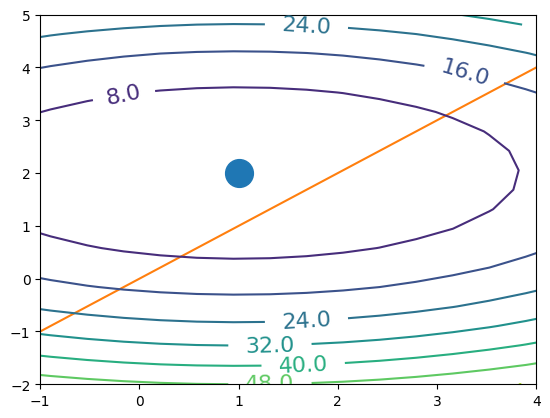

In [24]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-2, 5, 20)
y = np.linspace(-2, 5, 20)

plt.plot(1, 2, marker="o", markersize=20)
plt.plot(x, y)

xs, ys = np.meshgrid(x, y)
zs = (xs - 1) ** 2 + 3 * (ys - 2) ** 2
ax = plt.contour(xs, ys, zs)
ax.clabel(fmt='%1.1f', fontsize=16) 

plt.xlim([-1, 4])
plt.xlim([-1, 4])

ここから先は具体的な制約付き最適化問題の解法について学びます．

## ペナルティ関数法

次の最適化問題について考えてみましょう．

$$
\min_{x \in \mathbb{R}^n} f(x) \mathrm{ s.t. } x \in S
$$

ペナルティ関数法は，上の制約付き最適化問題を次のペナルティ関数を使って制約なし最適化問題として扱います：

---

**ペナルティ関数**

実行可能領域$S$に対して，次の条件を満たす関数$P(x)$をペナルティ関数といいます．

1. $P: \mathbb{R}^n \to \mathbb{R}$が非負連続関数
2. $x \in S$に対して$P(x)=0$
3. $x \notin S$ に対して$P(x) > 0$

例えば不等式成約に対しては
$$
P(x) = \frac{1}{2} \sum^p_{i=1} (\max\{g_i(x), 0\})^2
$$
がよく使われます．

---

次の制約なし最適化問題を考えましょう：
$$
q(c, x)=f(x) + cP(x)
$$
ここで$c$は正の実数です．無限大に発散する正の数列$c_k \nearrow \infty$に対して，
$$
\min_{x} q(c_k, x)
$$
の最適解を$x_k$とします．

このとき，数列$\{x_k\}$の任意の集積点は制約付き最適化問題の大域的最適解になります．

**証明**

集積点に収束する部分点列を$x_k \to \bar{x}$とします．
関数$f$の連続性から
$$
\lim_{k \to \infty} f(x_k) = f(\bar{x})
$$
です．さらに$c_k$の単調性から
$$
q(c_{k+1}, x_{k+1}) \geq f(x_{k+1}) + c_k P(x_{k+1}) \geq q(c_k, x_k)
$$
です．また，最適解$x^*$の定義から
$$
f(x_k) \leq q(c_k, x_k) \leq f(x^*)
$$
は成り立ちます．
よって$q(c_k, x_k)$が上に有界な単調増加列なので，極限値$q^*$をもち，
$$
\lim_{k\to \infty} q(c_k, x_k) = q^* \leq f(x^*)
$$
が成立します．このときペナルティ関数について
$$
\lim_{k\to \infty} c_k P(x_k) = \lim_{k\to \infty} q(c_k, x_k) - \lim_{k\to \infty} f(x_k) = q^* - f(\bar{x})
$$
であり，$c_k\to \infty$ なので，$P(x_k) \to P(\bar{x})=0$です．
よって$\bar{x} \in S$となります．
さらに$f(x_k) \to f(\bar{x}) \leq f(x^*)$より，$\bar{x}$が最適解であることがわかります．

---


TODO: ペナルティ関数法の単調性，$c_k$についての最適化，正確なペナルティ関数法について書く．


# バリア関数法

* [機械学習のための連続最適化](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E9%80%A3%E7%B6%9A%E6%9C%80%E9%81%A9%E5%8C%96-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E9%87%91%E6%A3%AE-%E6%95%AC%E6%96%87/dp/406152920X) 11.3章

次の最適化問題を考えます．

$$
\min_{x \in \mathbb{R}^n} f(x) \; \text{ s.t. }\; x \in S
$$

関数$f$は連続とします．また，実行可能領域$S$は内部$\operatorname{int}(S)$をもち，

$$S=\operatorname{cl}(\operatorname{int}(S))
$$
とします（$\operatorname{cl}$は閉包を表します）．つまり，$S$の任意の点は，内点に含まれる点列$\{x_k\}\subset \operatorname{int}(S)$の極限として表せるとします．
今回は$S$として，

$$
S=\{x\in \mathbb{R}^n\mid g_i(x) \leq 0, \; i=1,\dots, p\}
$$
を扱います．


---

**バリア関数**

最適化問題について，次を満たす関数$B(x)$を$S$のバリア関数と呼びます．

1. $B(x)$は$\operatorname{int}(S)$上で定義された非負値連続関数
2. 点列$\{x_k\}\subset \operatorname{int}(S)$が$S$の境界の点に収束するとき，$\lim_{k\to \infty}B(x_k)=\infty$

例えば，

$$
B(x)=-\sum^p_{i=1}\log(-g_i(x))
$$

はバリア関数です．

---

バリア関数を使って，制約付き最適化と等価な形式を考えてみます．次の関数を考えましょう．

$$
r(c, x)=f(x) + \frac{1}{c}B(x)
$$

無限大に単調に発散する正実数の数列$\{c_k\}$に対して，

$$
\min_{x\in \mathbb{R}^n}r(c_k, x) \; \text{ s.t. }\; x \in \operatorname{int}(S)
$$

の大域的最適解を$x_k$とします．
このとき，最適解が存在するならば，点列$\{x_k\}$の集積点は制約付き最適化問題の大域的最適解です．

---

**証明**

集積点に収束する部分点列を$x_k\to \bar{x}$，$k\to \infty$とします．このとき，$x_k\in \operatorname{int}(S)$なので，$S$の仮定から$\bar{x}\in S$です．制約付き最適化問題の最適解を$x^*$とすると，$\{z_t\}\subset \operatorname{int}(S)$で$\lim_{t\to\infty}z_t=x^*$となる点列が存在します．

また，点列$\{x_k\}$は$c_k$が与えられた際の$x$の最小値なので，任意の$z_t$に対して

$$
f(x_k) \leq r(c_k, x_k) \leq r(c_k, z_k) = f(z_t) + \frac{1}{c_k} B(z_t)
$$

が成立します．このとき，$k\to \infty$とすれば，$f(\bar{x})\leq f(z_t)$ であり，$t\to \infty$とすれば

$$
f(\bar{x}) \leq f(x^*)
$$

です．証明終わり．

